<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


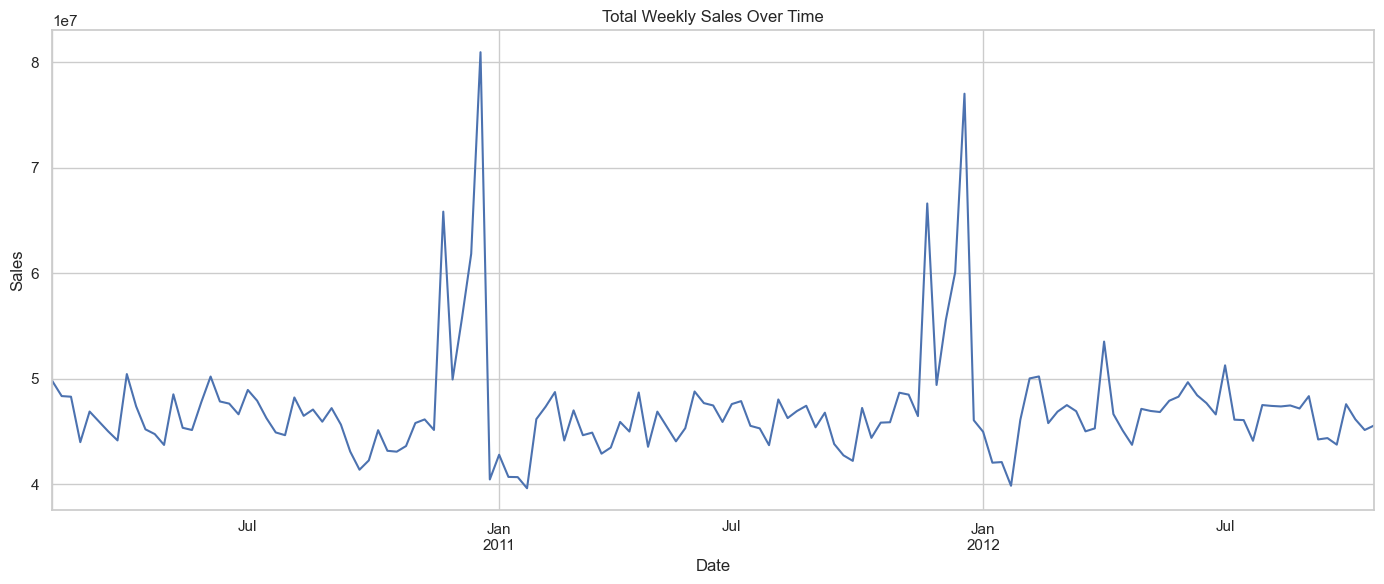

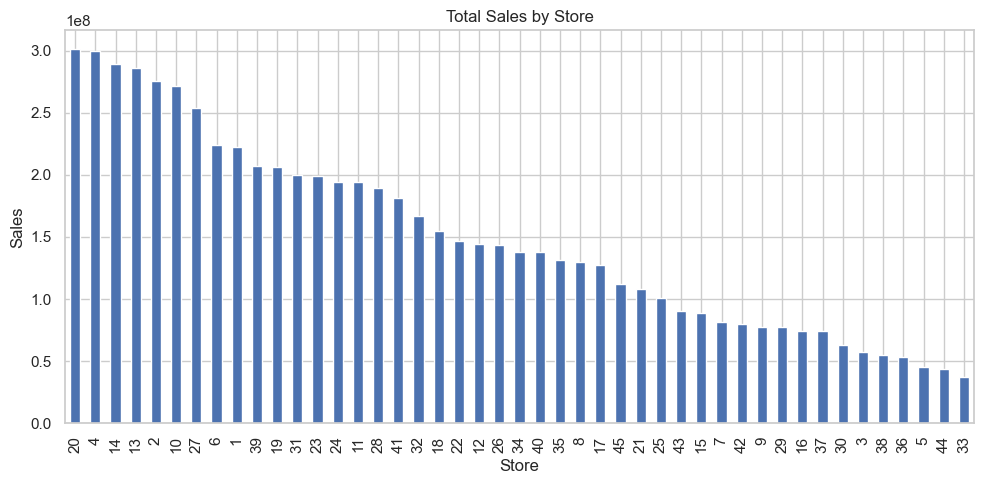

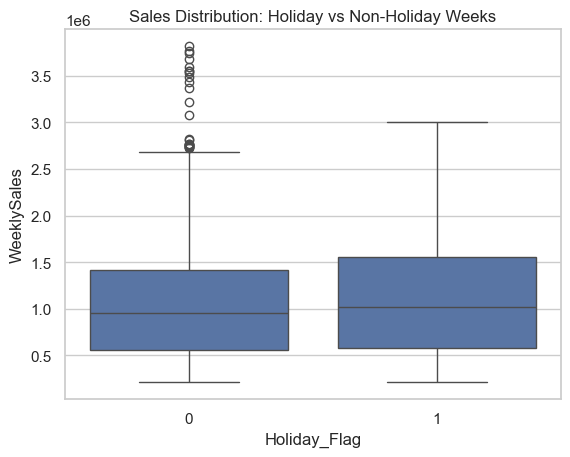

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv('walmart_sales.csv')

df.shape

# Info about columns and types
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Unique values per column
df.nunique()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# Optional renaming
df.rename(columns={'Weekly_Sales': 'WeeklySales'}, inplace=True)

plt.figure(figsize=(14, 6))
df.groupby('Date')['WeeklySales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()
#Sales by store
plt.figure(figsize=(10,5))
df.groupby('Store')['WeeklySales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Store')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()
#Holiday vs Non Holiday sales
sns.boxplot(x='Holiday_Flag', y='WeeklySales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday Weeks')
import os


os.makedirs('data/cleaned', exist_ok=True)


df.to_csv('data/cleaned/walmart_sales_cleaned.csv', index=False)






In [20]:
df.head()
df['Store'].unique()
df.head()
df.index


RangeIndex(start=0, stop=6435, step=1)

In [15]:
import sqlite3

# Connect to SQLite (or create one)
conn = sqlite3.connect('walmart_sales.db')

# Push DataFrame into a SQL table
df.to_sql('sales', conn, if_exists='replace', index=False)

# Query example
query = """
SELECT Store, AVG(WeeklySales) as AvgSales
FROM sales
GROUP BY Store
ORDER BY AvgSales DESC
"""
pd.read_sql_query(query, conn)


,Store,AvgSales
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06
